In [1]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import geomstats.backend as gs
import geomstats.datasets.utils as data_utils
from geomstats.geometry.pre_shape import KendallShapeMetric, PreShapeSpace
from geomstats.visualization import KendallDisk, KendallSphere

INFO: Using numpy backend
INFO: NumExpr defaulting to 4 threads.


## Generate N triangles (3-tuples), each one drawn i.i.d. from a multivariate normal distribution

In [3]:
import numpy as np

def random_gaussian_kendall_shapes(m,k,means,cov,N):
   
    shapes = []

    for i in range(N):
        shape = []
        for j in range(k):
            R = np.random.multivariate_normal(means[j],cov)
            shape.append(R)
        shapes.append(shape)

    shapes = np.array(shapes)
    
    return shapes

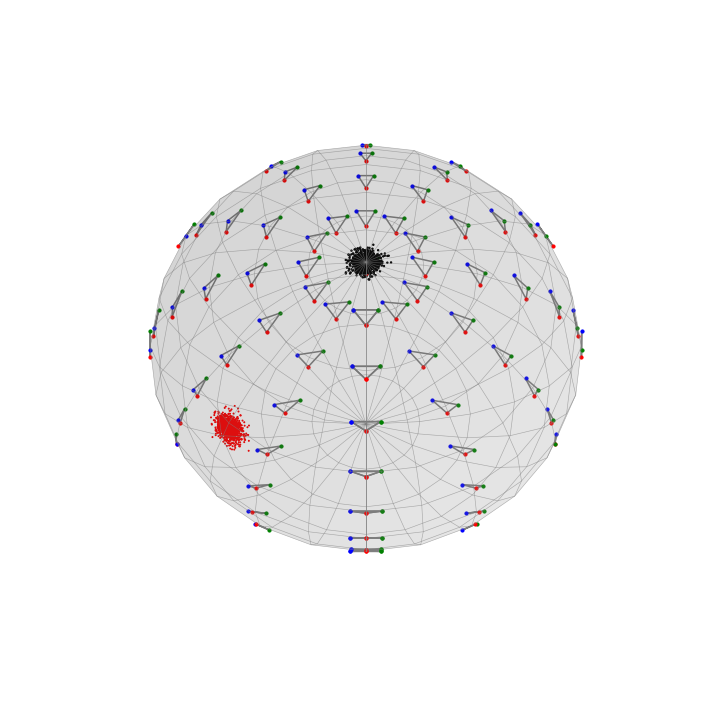

In [4]:
m = 2  # number of spatial dimensions
k = 3  # number of landmarks

N = 1000  # number of randomly drawn k-tuples 

var = 0.001
cov_eq = var*np.diag([1,1]) # isotropic covariance matrix


## specify covariance matrix & mean values of x-y coordinates for each landmark


## Equilateral mean triangle:
means_eq = [(2,0),(1,np.sqrt(3)),(0,0)]
cov_eq = var*np.diag([1,1])     # isotropic covariance matrix

triangles_eq = random_gaussian_kendall_shapes(m,k,means_eq,cov_eq,N)

## 30-60-90 mean triangle:

means30_60_90 = [(0,0),(1,np.sqrt(3)),(1,0)]
cov_30_60_90 = var*np.diag([1,1])

triangles_30_60_90 = random_gaussian_kendall_shapes(m,k,means30_60_90,cov_30_60_90,N)

S = KendallSphere(point_type = "extrinsic")

fig = plt.figure(figsize=(10, 10))
S.draw()

S.clear_points()
S.add_points(triangles_eq)
S.draw_points(color="k", s=2)

S.clear_points()
S.add_points(triangles_30_60_90)
S.draw_points(color="r",s=1)